<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

#  Data Science and AI
## Lab 7.2: Random Forests

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find and answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.7419
    - **ROC AUC**  = 0.6150
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first stp is to idenfy the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labour and iteractive processes. It is part of the process to repeat, review and change when finding a dead-end.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh 
        Department of Information Management 
        Chung-Hua University, 
        Hsin Chu, Taiwan 30067, R.O.C. 

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper: 

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

In [ ]:
# Find the dataset described above 
# Hint: search for it through the UCI Machine Learning Repository

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [89]:
# Import libraries
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from time import time


In [3]:
# Read data in pandas
df = pd.read_csv('transfusion.data', delimiter =",")

# Check data has loaded correctly

# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [5]:
# Perform EDA by investigating each of the points above 
df.rename(columns = {'Recency (months)':'recency','Frequency (times)':'frequency','Monetary (c.c. blood)':'monetary','Time (months)':'times','whether he/she donated blood in March 2007':'donated_blood_0307'}, inplace = True)

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

In [ ]:
# Filter/subset/clean the data according to your EDA findings

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [6]:
# Split your data
X = df.drop(columns = ['donated_blood_0307'])
y = df['donated_blood_0307']

In [7]:
features = X.columns

scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)

normalized_df = normalize(scaled_df)

X = pd.DataFrame(normalized_df, columns = features)

In [8]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =42)

# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [288]:
#Choosing parameters

#Criterion
n_estimators = 200 #200

criterion = 'gini'

max_depth = 4

min_samples_split = 23

min_samples_leaf = 1

bootstrap = True

random_state = 42 

ccp_alpha = 0

In [289]:
# Choose a model or models
rf = RandomForestClassifier(n_estimators = n_estimators, 
                            criterion = criterion,
                            max_depth = max_depth,
                            min_samples_split = min_samples_split,
                            min_samples_leaf = min_samples_leaf,
                            bootstrap = bootstrap,
                            random_state = random_state,
                            ccp_alpha = ccp_alpha)

# Step 9: Fit the Model

In [290]:
%%time
# Fit model
rf.fit(X_train,y_train)

CPU times: user 201 ms, sys: 9.1 ms, total: 210 ms
Wall time: 216 ms


RandomForestClassifier(ccp_alpha=0, max_depth=4, min_samples_split=23,
                       n_estimators=200, random_state=42)

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [291]:
# Evaluate model against training set
rf.score(X_train,y_train)

y_tpred = rf.predict(X_train)

print(f'The accuracy score for the train data is {rf.score(X_train,y_train)}')

The accuracy score for the train data is 0.822742474916388


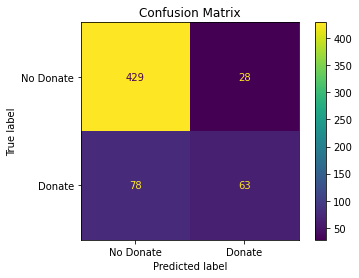

In [292]:
class_names = ['No Donate','Donate']
plot_confusion_matrix(rf,X_train,y_train, normalize = None, display_labels = class_names)
plt.title('Confusion Matrix')
plt.show()

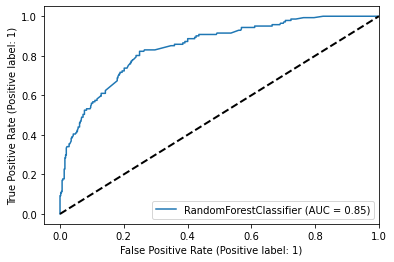

In [293]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(rf, X_train, y_train)
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.show()

# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [294]:
# Evaluate model against test set
y_pred = rf.predict(X_test)

print(f'The accuracy score for the test data is {rf.score(X_test,y_test)}')

The accuracy score for the test data is 0.7866666666666666


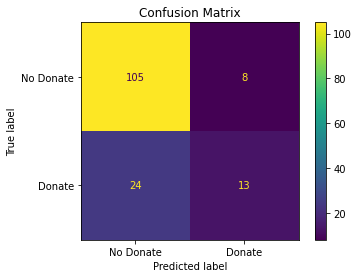

In [295]:
class_names = ['No Donate','Donate']
plot_confusion_matrix(rf,X_test,y_test, normalize = None, display_labels = class_names)
plt.title('Confusion Matrix')
plt.show()

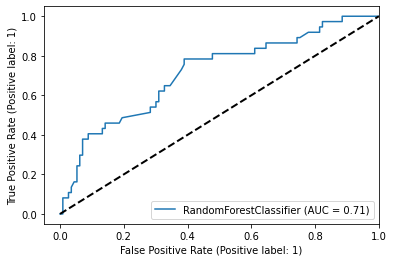

In [296]:
plot_roc_curve(rf, X_test, y_test)
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.show()

In [301]:
rf.feature_importances_

array([0.38381498, 0.18589674, 0.18466745, 0.24562083])

# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

In [302]:
from sklearn.model_selection import GridSearchCV

params = {'criterion':['gini','entropy'],
          'n_estimators':[50,100,500], 
          'max_depth': np.arange(1,5),
          'min_samples_split':np.arange(20,30),
          'n_jobs': [-1]}


In [303]:
%%time

rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

grid = GridSearchCV(rf_model,params)
grid.fit(X_train,y_train)

CPU times: user 2min 32s, sys: 9.75 s, total: 2min 42s
Wall time: 2min 52s


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4]),
                         'min_samples_split': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'n_estimators': [50, 100, 500], 'n_jobs': [-1]})

In [304]:
grid.best_score_

0.7993697478991596

In [305]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_split': 24,
 'n_estimators': 50,
 'n_jobs': -1}

>

>

>



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



